 # Wine Quality Prediction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
wine_df = pd.read_csv('winequality-red.csv')

In [6]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data provided appears to be a tabular dataset with 12 columns and multiple rows, where each row represents a sample of wine and each column represents a different feature of that wine. The features are described below:

Fixed acidity: the amount of fixed acids in the wine (g/dm^3)                                    
Volatile acidity: the amount of volatile acids in the wine (g/dm^3)                                   
Citric acid: the amount of citric acid in the wine (g/dm^3)                                           
Residual sugar: the amount of residual sugar in the wine (g/dm^3)                                 
Chlorides: the amount of chlorides in the wine (g/dm^3)                                            
Free sulfur dioxide: the amount of free sulfur dioxide in the wine (mg/dm^3)                         
Total sulfur dioxide: the amount of total sulfur dioxide in the wine (mg/dm^3)                         
Density: the density of the wine (g/cm^3)                                                                                          
pH: the pH level of the wine                                                                                                                        
Sulphates: the amount of sulphates in the wine (g/dm^3)                                                            
Alcohol: the alcohol content of the wine (% vol)                                                    
Quality: a rating of the quality of the wine (scored between 0 and 10)                                           

In [7]:
# checking for missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visulaization

In [8]:
# statistical measures of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# number of values for each quality
Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.

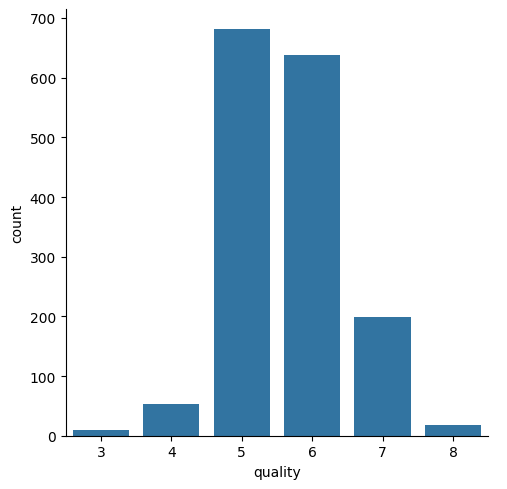

In [9]:
sns.catplot(x='quality',data=wine_df,kind='count')

# volatile acidity vs Quality
A bar plot is a type of plot that shows the relationship between a categorical variable and a continuous variable using bars. In this case, the quality variable is a categorical variable with values ranging from 3 to 9, and the volatile acidity variable is a continuous variable representing the level of volatile acidity in each wine sample.

The height of each bar represents the average volatile acidity level for each quality score. This plot can help us understand the relationship between quality and volatile acidity, and how volatile acidity levels vary across different quality scores.

<Axes: xlabel='quality', ylabel='volatile acidity'>

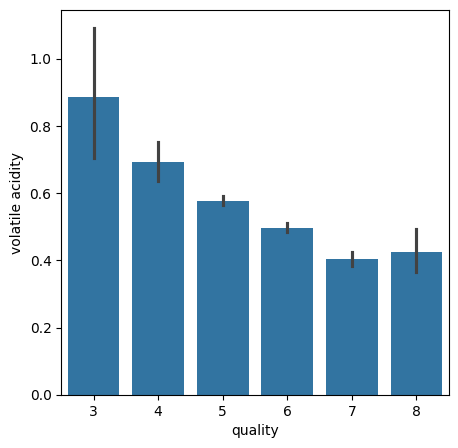

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_df)

# citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

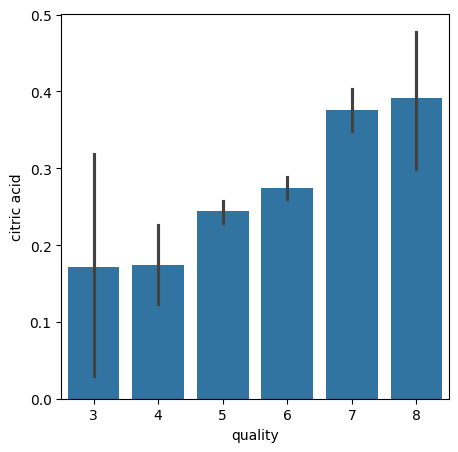

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_df)

# Correlation                              
is a statistical measure that describes the degree to which two variables are related to each other. It indicates the strength and direction of the relationship between the variables.

# Positive correlation                           
refers to a relationship between two variables in which they both move in the same direction. That is, as one variable increases, the other variable also increases. For example, there is a positive correlation between a person's age and their income, as older people tend to have higher incomes.

# Negative correlation                              
, on the other hand, refers to a relationship between two variables in which they move in opposite directions. That is, as one variable increases, the other variable decreases. For example, there is a negative correlation between the amount of exercise a person does and their weight, as people who exercise more tend to weigh less.

In [12]:
correlation = wine_df.corr()

# constructing a heatmap to understand the correlation between the columns

A heatmap is a type of plot that displays the correlation matrix between different variables using colors. The cells of the heatmap are color-coded based on the correlation coefficient values. Positive correlations are shown in shades of blue, while negative correlations are shown in shades of red.

This code is useful for visualizing the correlations between different variables in a dataset. The heatmap() function is particularly useful for datasets with a large number of variables, as it allows for easy identification of correlations between different pairs of variables. The annot parameter adds numerical values to the heatmap cells, which can help in interpreting the correlation matrix. The square parameter ensures that the cells are square-shaped, which can make the heatmap easier to read.

<Axes: >

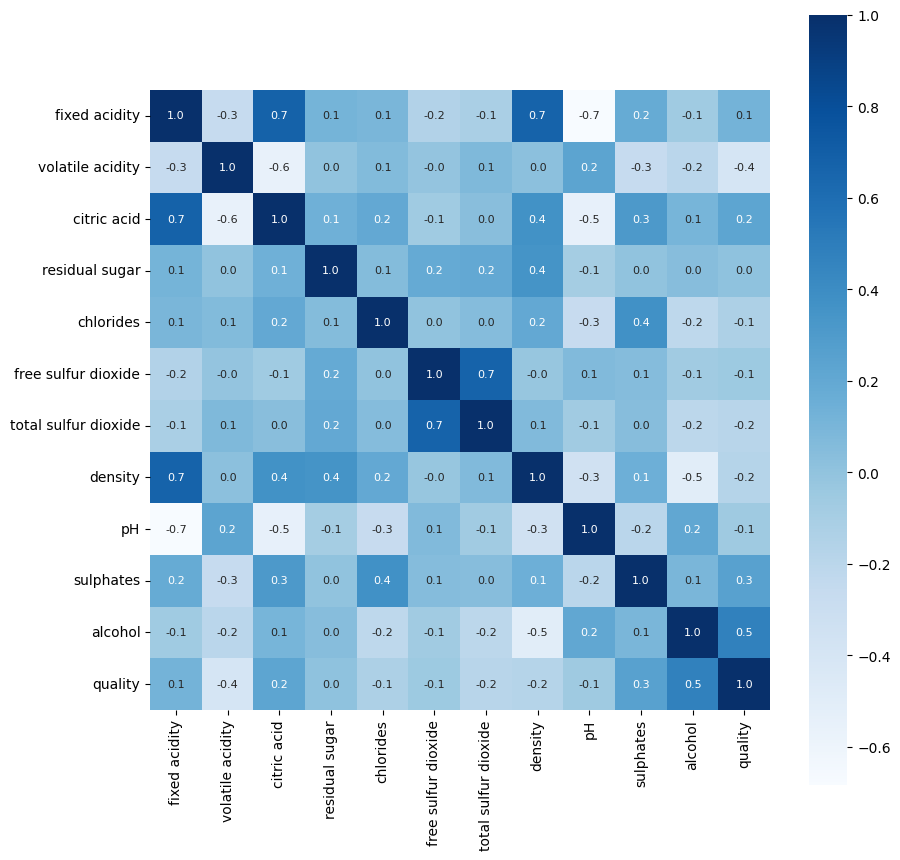

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='Blues')

# separate the data and Label

In [14]:
X = wine_df.drop('quality',axis=1)

In [15]:
y = wine_df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [16]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# Train & Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [18]:
print(y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Model Training:

# Random Forest Classifier

In [19]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Model Evaluation

Accuracy Score

In [20]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, Y_test))

0.9375


# Building a Predictive System

In [21]:
input_data = (6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6)
np_input_data = np.asarray(input_data)
reshaped_data = np_input_data.reshape(1,-1)
predict = model.predict(reshaped_data)

if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine


d:\MLP\Wine-quality\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
wine_df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1364,7.2,0.605,0.02,1.9,0.096,10.0,31.0,0.99500,3.46,0.53,11.8,6
1133,7.2,0.480,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
27,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
745,7.3,0.510,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,6
613,8.2,0.390,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
313,8.6,0.470,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.4,5
1427,7.6,0.410,0.33,2.5,0.078,6.0,23.0,0.99570,3.30,0.58,11.2,5
154,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5
1209,6.2,0.390,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7
